In [ ]:
!pip install -r requirements.txt

In [5]:
import os
import mne
import shutil
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [6]:
#os.chdir("42_Total_perspective_vortex")

if not os.path.exists('data'):
    os.makedirs('data')

In [12]:
# URL del archivo a descargar
url = "https://physionet.org/files/eegmmidb/1.0.0/S001/S001R03.edf?download"
local_filename = "data/S001R03.edf"

if not os.path.exists(local_filename):
	response = requests.get(url, stream=True)

	if response.status_code == 200:
		with open(local_filename, 'wb') as file:
			for chunk in response.iter_content(chunk_size=8192):
				if chunk:
					file.write(chunk)
		print(f"Archivo descargado correctamente como {local_filename}")
	else:
		print(f"Error en la descarga. Status code: {response.status_code}")


Archivo descargado correctamente como data/S001R03.edf


Extracting EDF parameters from /sgoinfre/students/imontero/42_total_perspective_vortex/data/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


<Figure size 640x480 with 0 Axes>

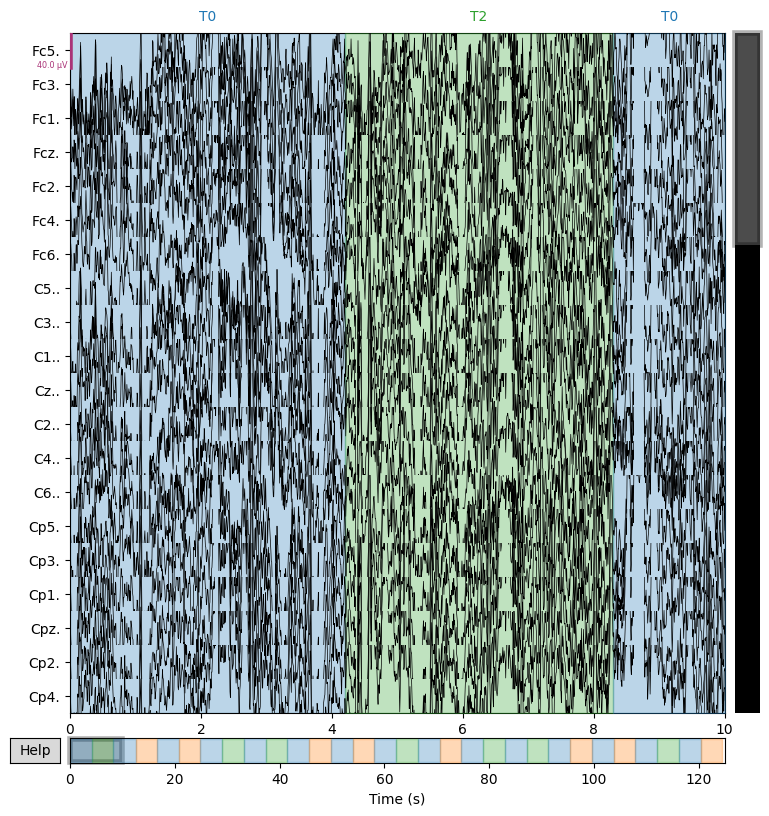

In [51]:
path = "data/S001R03.edf"
raw_data = mne.io.read_raw_edf(path, preload=True)
raw_data.plot()


In [73]:
import sys
import os
import pickle

#save raw data as pickle
with open('data/raw_data.pickle', 'wb') as f:
    pickle.dump(raw_data, f)

#execute the script pyplot.py passing the path of the raw data
os.system('python3 plot.py data/raw_data.pickle')


Using matplotlib as 2D backend.
Figure(2247x1509)


0

In [45]:
from mne.channels import make_standard_montage

montage = mne.channels.make_standard_montage('standard_1005')
raw_data.set_montage(montage, on_missing='ignore')

<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>

In [57]:
def rename_channels(raw) -> None:
    """
    Rename channels in an MNE raw object to match the standard 1005 montage.

    Parameters:
        raw: The MNE raw object containing EEG data. The channels in this object will be renamed according to the standard 1005 montage.

    Returns:
        None: The function modifies the `raw` object in place and does not return anything.
    """
    mapping = {
        'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2', 'Fc4.': 'FC4', 'Fc6.': 'FC6',
        'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1', 'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6',
        'Cp5.': 'CP5', 'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4', 'Cp6.': 'CP6',
        'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2', 'Af7.': 'AF7', 'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8',
        'F7..': 'F7', 'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2', 'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8',
        'Ft7.': 'FT7', 'Ft8.': 'FT8', 'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10', 'Tp7.': 'TP7', 'Tp8.': 'TP8',
        'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1', 'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8',
        'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8', 'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 'Iz..': 'Iz'
    }
    raw.rename_channels(mapping)

In [59]:
# Obtener los nombres actuales de los canales
current_ch_names = raw_data.ch_names

# Crear una nueva lista con los nombres en mayúsculas
new_ch_names = [name.upper() for name in current_ch_names]

# Asignar los nuevos nombres al objeto raw_data
raw_data.rename_channels(dict(zip(current_ch_names, new_ch_names)))

raw_data.rename_channels(lambda x: x.strip('.'))

# Verificar los cambios
print(raw_data.ch_names)


['FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'FP1', 'FPZ', 'FP2', 'AF7', 'AF3', 'AFZ', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POZ', 'PO4', 'PO8', 'O1', 'OZ', 'O2', 'IZ']


In [60]:
picks = mne.pick_types(raw_data.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')
print(picks)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


In [61]:
# Plot the topographic map
raw_data.plot_sensors(show_names=True, kind='topomap', ch_type='eeg')

RuntimeError: No valid channel positions found

In [62]:
# Extraer los eventos de las anotaciones
events, event_id = mne.events_from_annotations(raw_data)

# Mostrar los eventos y sus identificadores
print(events[:])  # Mostrar los primeros 10 eventos
print(event_id)     # Mostrar el diccionario de eventos

Used Annotations descriptions: ['T0', 'T1', 'T2']
[[    0     0     1]
 [  672     0     3]
 [ 1328     0     1]
 [ 2000     0     2]
 [ 2656     0     1]
 [ 3328     0     2]
 [ 3984     0     1]
 [ 4656     0     3]
 [ 5312     0     1]
 [ 5984     0     3]
 [ 6640     0     1]
 [ 7312     0     2]
 [ 7968     0     1]
 [ 8640     0     2]
 [ 9296     0     1]
 [ 9968     0     3]
 [10624     0     1]
 [11296     0     2]
 [11952     0     1]
 [12624     0     3]
 [13280     0     1]
 [13952     0     3]
 [14608     0     1]
 [15280     0     2]
 [15936     0     1]
 [16608     0     2]
 [17264     0     1]
 [17936     0     3]
 [18592     0     1]
 [19264     0     2]]
{'T0': 1, 'T1': 2, 'T2': 3}


In [63]:
display(raw_data)

<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>

In [16]:
data, times = raw_data[:]

df = pd.DataFrame(data.T, columns=raw_data.ch_names)
df['Time'] = times

In [17]:
print(df.columns)

Index(['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..',
       'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.',
       'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.',
       'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..',
       'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.',
       'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..',
       'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..',
       'Iz..', 'Time'],
      dtype='object')


In [18]:
display(df.describe())

Fc5.          Fc3.          Fc1.          Fcz.          Fc2.  \
count  20000.000000  2.000000e+04  2.000000e+04  2.000000e+04  2.000000e+04   
mean      -0.000002  5.303500e-07  9.925500e-07  9.110000e-07  4.735500e-07   
std        0.000061  5.844256e-05  5.694597e-05  5.750714e-05  5.417671e-05   
min       -0.000261 -2.590000e-04 -2.420000e-04 -2.470000e-04 -2.450000e-04   
25%       -0.000037 -3.500000e-05 -3.500000e-05 -3.600000e-05 -3.300000e-05   
50%       -0.000003 -1.000000e-06 -1.000000e-06 -1.000000e-06 -1.000000e-06   
75%        0.000032  3.400000e-05  3.400000e-05  3.500000e-05  3.200000e-05   
max        0.000354  3.430000e-04  3.310000e-04  3.140000e-04  3.010000e-04   

               Fc4.          Fc6.          C5..          C3..          C1..  \
count  20000.000000  2.000000e+04  20000.000000  2.000000e+04  20000.000000   
mean       0.000001 -7.095000e-08     -0.000002  9.693500e-07     -0.000001   
std        0.000050  4.626137e-05      0.000057  5.360952e-05      0.000053   
min       -0.000227 -1.980000e-04     -0.000249 -2.190000e-04     -0.000202   
25%       -0.000030 -2.900000e-05     -0.000038 -3.300000e-05     -0.000036   
50%       -0.000001 -2.000000e-06     -0.000004 -1.000000e-06     -0.000003   
75%        0.000030  2.500000e-05      0.000031  3.300000e-05      0.000031   
max        0.000278  3.040000e-04      0.000324  3.130000e-04      0.000291   

       ...          Po7.          Po3.          Poz.          Po4.  \
count  ...  2.000000e+04  20000.000000  20000.000000  2.000000e+04   
mean   ... -2.472500e-07     -0.000003     -0.000002 -3.458000e-07   
std    ...  5.139948e-05      0.000054      0.000054  5.007433e-05   
min    ... -1.920000e-04     -0.000210     -0.000240 -2.490000e-04   
25%    ... -3.400000e-05     -0.000039     -0.000038 -3.400000e-05   
50%    ... -3.000000e-06     -0.000005     -0.000004 -2.000000e-06   
75%    ...  3.200000e-05      0.000031      0.000034  3.200000e-05   
max    ...  2.410000e-04      0.000228      0.000206  1.910000e-04   

               Po8.          O1..          Oz..          O2..          Iz..  \
count  2.000000e+04  20000.000000  20000.000000  20000.000000  20000.000000   
mean  -1.496500e-07     -0.000002     -0.000002     -0.000002     -0.000001   
std    4.959308e-05      0.000053      0.000052      0.000059      0.000051   
min   -2.740000e-04     -0.000211     -0.000235     -0.000254     -0.000194   
25%   -3.300000e-05     -0.000037     -0.000036     -0.000041     -0.000035   
50%   -2.000000e-06     -0.000004     -0.000004     -0.000004     -0.000003   
75%    3.200000e-05      0.000031      0.000031      0.000035      0.000031   
max    2.100000e-04      0.000213      0.000213      0.000229      0.000238   

               Time  
count  20000.000000  
mean      62.496875  
std       36.085294  
min        0.000000  
25%       31.248438  
50%       62.496875  
75%       93.745313  
max      124.993750  

[8 rows x 65 columns]

<Figure size 640x480 with 0 Axes>

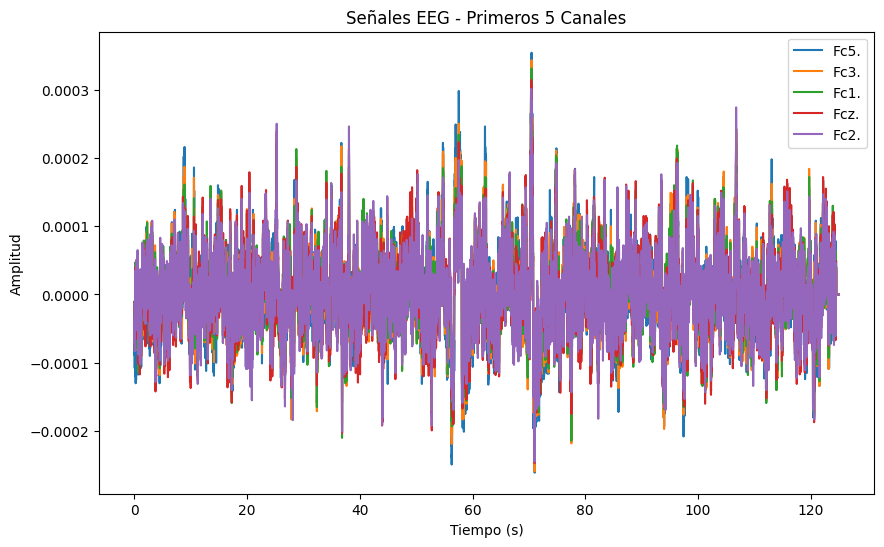

In [19]:
# Graficar los primeros 5 canales de EEG a lo largo del tiempo
df.plot(x='Time', y=df.columns[:5], figsize=(10, 6))
plt.title('Señales EEG - Primeros 5 Canales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

In [20]:
# Mostrar las anotaciones (eventos) presentes en los datos
annotations = raw_data.annotations
print(annotations)


<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>


In [21]:
# Extraer los eventos de las anotaciones
events, event_id = mne.events_from_annotations(raw_data)

# Mostrar los eventos y sus identificadores
print(events[:10])  # Mostrar los primeros 10 eventos
print(event_id)     # Mostrar el diccionario de eventos


Used Annotations descriptions: ['T0', 'T1', 'T2']
[[   0    0    1]
 [ 672    0    3]
 [1328    0    1]
 [2000    0    2]
 [2656    0    1]
 [3328    0    2]
 [3984    0    1]
 [4656    0    3]
 [5312    0    1]
 [5984    0    3]]
{'T0': 1, 'T1': 2, 'T2': 3}


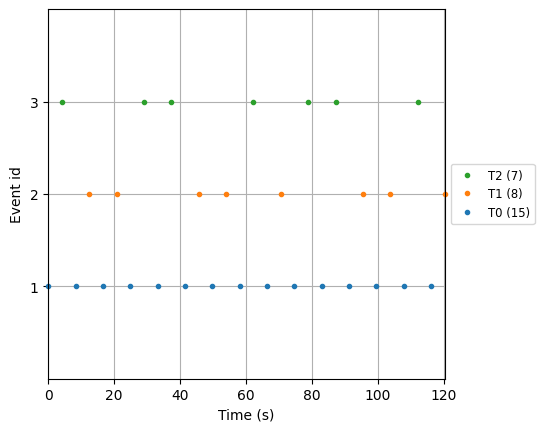

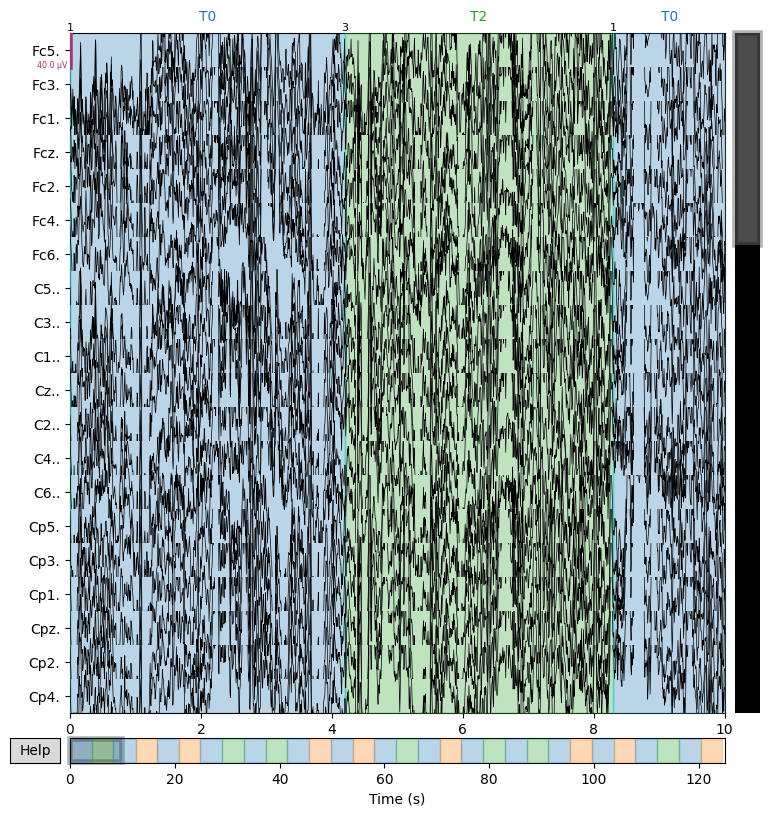

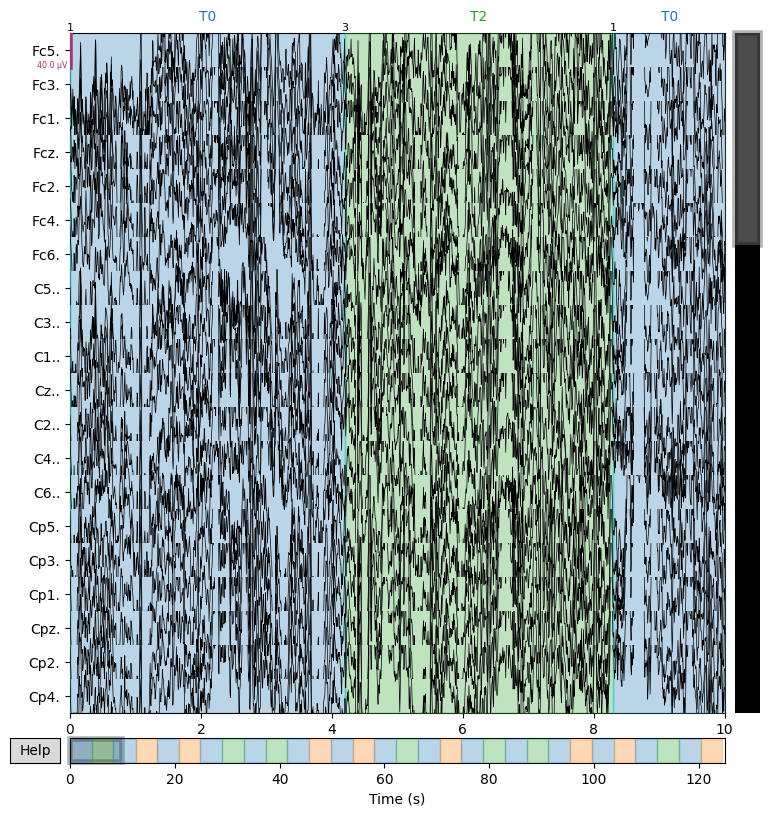

In [22]:
# Graficar los datos de EEG con los eventos marcados
mne.viz.plot_events(events, raw_data.info['sfreq'], raw_data.first_samp, event_id=event_id)
raw_data.plot(events=events)


The human brain operates across a wide range of frequencies, with different types of brain waves associated with different states of consciousness and cognitive functions. Here are the most common brain wave frequencies:

Delta Waves (0.5 - 4 Hz)

Associated States: Deep sleep, unconsciousness
Characteristics: Delta waves are the slowest brain waves and are primarily observed during deep, restorative sleep (Stages 3 and 4 of NREM sleep). They are associated with the body's healing and regeneration processes.
Theta Waves (4 - 8 Hz)

Associated States: Light sleep, relaxation, meditation, creativity
Characteristics: Theta waves are slower than alpha waves and are typically observed during light sleep (Stage 1 and 2 of NREM sleep) and deep meditation. They are associated with creativity, intuition, and relaxation.
Alpha Waves (8 - 12 Hz)

Associated States: Relaxed wakefulness, calmness, reflection
Characteristics: Alpha waves are present during relaxed, wakeful states when the eyes are closed and the mind is calm. They are often observed during moments of quiet reflection and relaxation.
Beta Waves (12 - 30 Hz)

Associated States: Active thinking, focus, alertness, problem-solving
Characteristics: Beta waves are fast brain waves associated with active, engaged mental states such as problem-solving, decision-making, and focused attention. High levels of beta wave activity can be associated with stress and anxiety.
Gamma Waves (30 - 100 Hz)

Frequency Range: 30 to 100 Hz
Associated States: High-level cognitive functioning, information processing, learning
Characteristics: Gamma waves are the fastest brain waves and are involved in high-level cognitive functions such as perception, consciousness, information processing, and learning. They are also linked to the integration of information across different brain regions.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


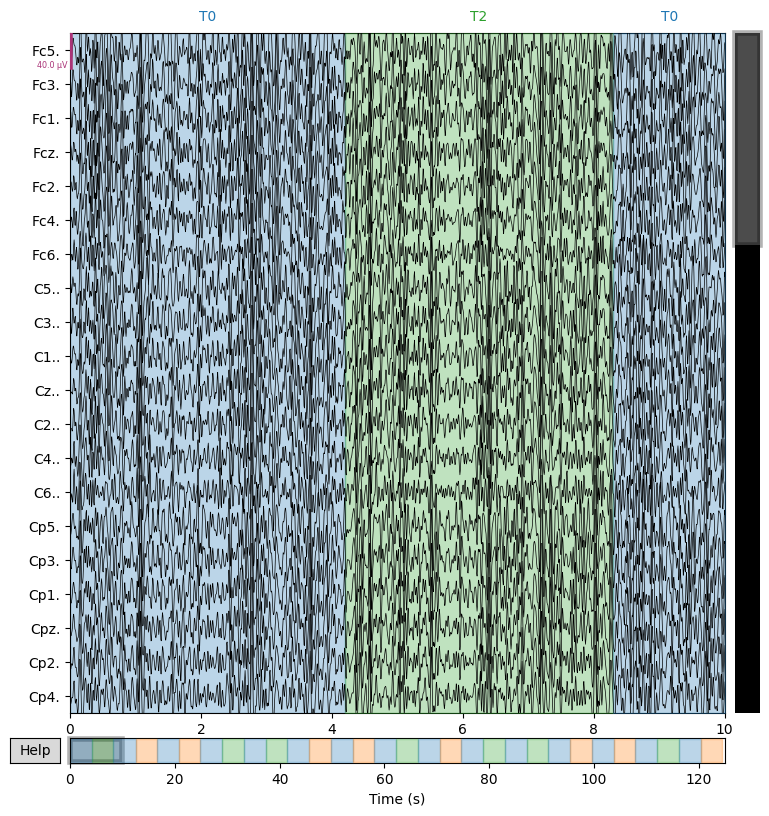

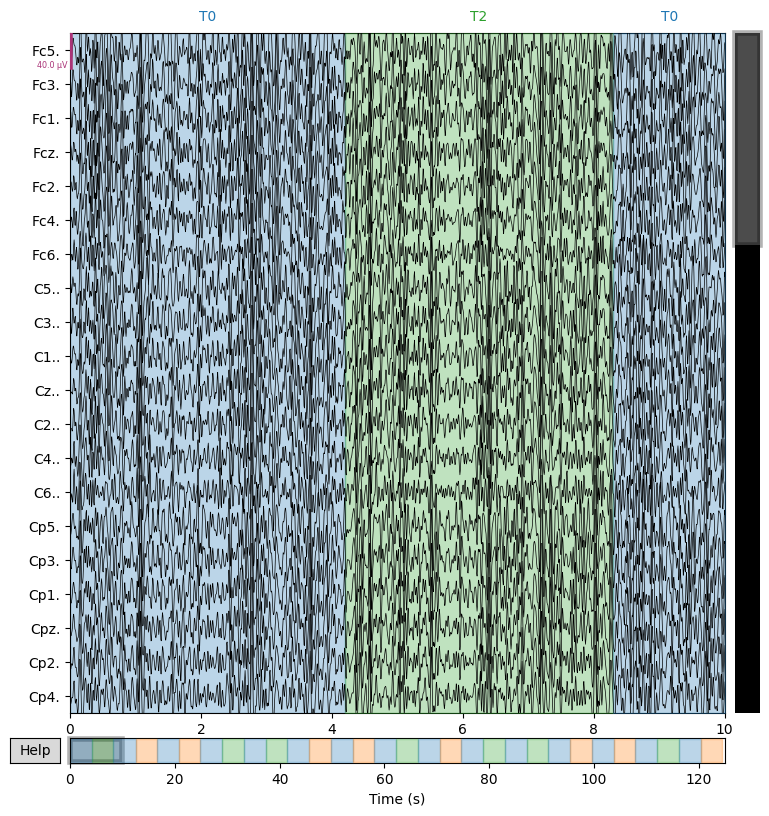

In [23]:
# Filtrar los datos para conservar solo las frecuencias entre 8 y 30 Hz (bandas mu y beta)
raw_filtered = raw_data.filter(l_freq=8, h_freq=30)

# Visualizar los datos filtrados
raw_filtered.plot()


Transformada de Fourier y Trasformada Wavelet

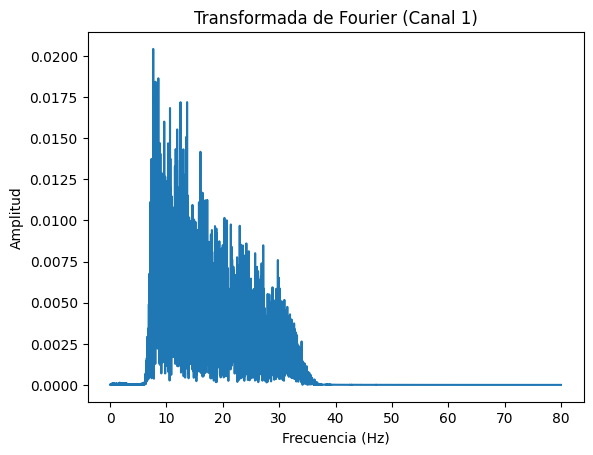

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los datos crudos del EEG
eeg_data, times = raw_filtered[:]

# Aplicar FFT a uno de los canales (por ejemplo, el primer canal)
fft_data = np.fft.fft(eeg_data[0])

# Obtener las frecuencias correspondientes
freqs = np.fft.fftfreq(len(fft_data), 1 / raw_filtered.info['sfreq'])

# Graficar la Transformada de Fourier (solo frecuencias positivas)
plt.plot(freqs[:len(freqs)//2], np.abs(fft_data)[:len(freqs)//2])
plt.title('Transformada de Fourier (Canal 1)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
inst is Evoked, setting `average=False`


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Applying baseline correction (mode: logratio)


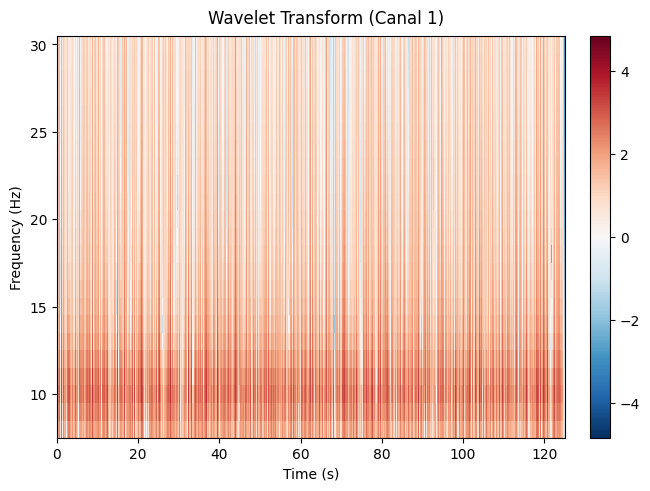

[<Figure size 640x480 with 2 Axes>]

In [25]:

# Definir las frecuencias de interés para el análisis wavelet
frequencies = np.arange(8, 31, 1)  # De 8 a 30 Hz

# Aplicar la Transformada Wavelet
power = mne.time_frequency.tfr_morlet(raw_filtered, freqs=frequencies, n_cycles=2, use_fft=True, return_itc=False)

# Graficar el espectrograma para uno de los canales (por ejemplo, el canal 1)
power.plot([0], baseline=(None, 0), mode='logratio', title='Wavelet Transform (Canal 1)')
